In [1]:
import pandas as pd
from IPython.display import display

In [2]:
df_company=pd.read_csv('data/company_names.csv')
df_brand=pd.read_csv('data/brand_names.csv')
df_alias=pd.read_csv('data/alias_names.csv')

In the DB you find a scheme brand_domain. There is a table for each tier: company, brand, alias.

Each company has one or more brands. Each brand has one or more aliases

### 1) Data

Exploratory data analysis

#### 1.1) Company

In [3]:
df_company.head()

,company_id,company_name,created_at,updated_at,company_status,is_mfr,is_supplier
0,5201,2J Antenna,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
1,5212,A&S,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
2,5213,A. Schweiger,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
3,5214,A.C.Ryan,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
4,5215,A+P,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN


In [4]:
df_company.shape

(5379, 7)

In [5]:
df_company.company_name.value_counts()

company_name
Ziller                    2
Wiha                      2
A. Schweiger              1
A.C.Ryan                  1
A+P                       1
                         ..
W.Diamant                 1
W. Schmitz                1
PHOENIX Armaturenwerke    1
LÖSCH                     1
Zmorph                    1
Name: count, Length: 5377, dtype: int64

Duplicate values

In [6]:
df_company[df_company['company_name']=='Wiha']

,company_id,company_name,created_at,updated_at,company_status,is_mfr,is_supplier
3798,10462,Wiha,2024-08-04 11:44:28.602563,2024-08-04 11:44:35.456561,NaN,NaN,NaN
5244,9892,Wiha,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN


In [7]:
df_company[df_company['company_name']=='Ziller']

,company_id,company_name,created_at,updated_at,company_status,is_mfr,is_supplier
3004,8182,Ziller,2023-08-25 12:48:41.39556,2023-11-23 14:39:49.278851,open,1.0,NaN
5357,10012,Ziller,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN


Few positive values for is_supplier

In [8]:
df_company.is_supplier.value_counts()

is_supplier
1.0    50
Name: count, dtype: int64

All NaN values apart from is_supplier

In [9]:
df_nan_selected = df_company[df_company.drop(columns=['is_supplier']).isnull().any(axis=1)]
df_nan_selected.head()

,company_id,company_name,created_at,updated_at,company_status,is_mfr,is_supplier
725,5893,Christ,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,close,NaN,1.0
726,10165,Josef Blässinger,2024-06-27 17:35:07.345519,2024-06-27 17:35:07.345519,NaN,NaN,NaN
727,10198,KRONES,2024-07-13 09:25:44.556469,2024-07-13 09:25:44.556469,NaN,NaN,NaN
1181,10199,JOTKEL,2024-07-15 13:12:16.94987,2024-07-15 13:12:16.94987,NaN,NaN,NaN
1548,6739,Gallus Ferd. Rüesch,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,close,NaN,1.0


In [10]:
df_nan_selected.shape

(614, 7)

In [11]:
df_company[df_company['company_id']==5201]

,company_id,company_name,created_at,updated_at,company_status,is_mfr,is_supplier
0,5201,2J Antenna,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN


#### 1.2) Brand

In [12]:
df_brand.head()

,brand_id,company_id,brand_name,created_at,updated_at
0,5467,5201,2J ANTENNA,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556
1,5469,5203,3D PRINTZ,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556
2,5470,5204,3D SYSTEMS,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556
3,5471,5205,3F,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556
4,5472,5206,3M,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556


In [13]:
df_brand.shape

(5793, 5)

In [14]:
df_brand.brand_name.value_counts()

brand_name
SAUNDERS            3
Kollmorgen          2
CONTITECH           2
Bauer Gear Motor    2
ELRO                2
                   ..
Almatec             1
Martonair           1
Sterling            1
BERNSTEIN TOOLS     1
Herding             1
Name: count, Length: 5777, dtype: int64

Stay with the last ID created?

In [15]:
df_brand[df_brand['brand_name']=='SAUNDERS']

,brand_id,company_id,brand_name,created_at,updated_at
3834,9327,8890,SAUNDERS,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556
5137,10916,10396,SAUNDERS,2024-07-31 09:09:41.796343,2024-07-31 09:09:41.796343
5138,10917,10396,SAUNDERS,2024-07-31 09:09:55.753181,2024-07-31 09:09:55.753181


#### 1.3) Alias

In [41]:
df_alias.head()

,alias_id,brand_id,alias_name,created_at,updated_at
0,7535,5466,1A Tapes E. K.,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556
1,7537,5467,2J Antenna,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556
2,7538,5468,2 MANET,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556
3,7539,5469,3D Printz,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556
4,7540,5470,3D Systems,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556


In [42]:
df_alias.shape

(8915, 5)

In [43]:
df_alias.alias_name.value_counts()

alias_name
DSBC                      3
SOMMER                    3
Filtration Group          2
IKA                       2
TURCK GMBH                2
                         ..
Hirschmann-Instruments    1
LE CARBONE-LORRAINE       1
Porcelaines-Avignon       1
GEWISS-SPA                1
TOTAL Plastics            1
Name: count, Length: 8848, dtype: int64

In [44]:
df_alias[df_alias['alias_name']=='DSBC']

,alias_id,brand_id,alias_name,created_at,updated_at
7402,15296,6967,DSBC,2024-08-06 13:41:18.943291,2024-08-06 13:41:18.943291
7405,15299,6967,DSBC,2024-08-06 13:41:35.941754,2024-08-06 13:41:35.941754
7408,15302,6967,DSBC,2024-08-06 13:41:58.309773,2024-08-06 13:41:58.309773


#### Combine them to have full understanding

In [45]:
# Merge brands with companies
df_merged = df_brand.merge(df_company, on="company_id", how="left")

# Merge brand aliases
df_final = df_alias.merge(df_merged, on="brand_id", how="left")

In [46]:
df_merged.head()

,brand_id,company_id,brand_name,created_at_x,updated_at_x,company_name,created_at_y,updated_at_y,company_status,is_mfr,is_supplier
0,5467,5201,2J ANTENNA,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,2J Antenna,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
1,5469,5203,3D PRINTZ,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,3D Printz,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
2,5470,5204,3D SYSTEMS,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,3D Systems,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
3,5471,5205,3F,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,3F,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
4,5472,5206,3M,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,3M,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN


1) How many brands per company name

In [47]:
brand_count = df_brand.groupby("company_id").size().reset_index(name="brand_count")
df_companies_brands = df_company.merge(brand_count, on="company_id", how="left").fillna(0)
display(df_companies_brands)

,company_id,company_name,created_at,updated_at,company_status,is_mfr,is_supplier,brand_count
0,5201,2J Antenna,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,0.0,1.0
1,5212,A&S,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,0.0,1.0
2,5213,A. Schweiger,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,0.0,1.0
3,5214,A.C.Ryan,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,0.0,1.0
4,5215,A+P,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
5374,10642,W.Diamant,2024-08-09 07:48:18.653927,2024-08-09 07:48:18.653927,0,0.0,0.0,1.0
5375,10748,W. Schmitz,2024-08-13 09:12:39.773154,2024-08-13 09:12:39.773154,0,0.0,0.0,1.0
5376,10843,PHOENIX Armaturenwerke,2024-08-28 08:54:04.923278,2024-08-28 08:54:04.923278,0,0.0,0.0,1.0
5377,10896,LÖSCH,2024-08-28 14:05:40.653313,2024-08-28 14:05:40.653313,0,0.0,0.0,1.0


8 values with no matched

Most of them just have one match

In [48]:
df_companies_brands.brand_count.value_counts()

brand_count
1.0     5205
2.0      101
3.0       35
4.0       13
0.0        8
5.0        6
8.0        2
23.0       1
9.0        1
7.0        1
10.0       1
11.0       1
32.0       1
72.0       1
13.0       1
6.0        1
Name: count, dtype: int64

In [49]:
df_companies_brands[df_companies_brands['brand_count']==0]

,company_id,company_name,created_at,updated_at,company_status,is_mfr,is_supplier,brand_count
3422,10101,MICROCENTRIC,2024-05-11 15:03:08.994229,2024-05-11 15:10:31.710388,0,0.0,0.0,0.0
3455,10132,ABF,2024-05-17 14:04:13.40854,2024-05-17 14:04:13.40854,open,0.0,1.0,0.0
3605,10604,SCHMIDTS Handelsgesellschaft,2024-08-08 11:59:48.618597,2024-08-08 11:59:48.618597,0,0.0,0.0,0.0
3608,10806,KÖRTING,2024-08-27 13:34:27.900842,2024-08-27 13:34:27.900842,0,0.0,0.0,0.0
3788,10461,WIKA Alexander Wiegand,2024-08-04 11:39:40.982731,2024-08-04 11:39:40.982731,0,0.0,0.0,0.0
3798,10462,Wiha,2024-08-04 11:44:28.602563,2024-08-04 11:44:35.456561,0,0.0,0.0,0.0
3801,10623,Schmolz + Bickenbach,2024-08-08 15:51:21.312852,2024-08-08 15:51:21.312852,0,0.0,0.0,0.0
3933,10943,JetSolutions,2024-08-29 13:11:09.232449,2024-08-29 13:11:09.232449,0,0.0,0.0,0.0


In [50]:
df_companies_brands[df_companies_brands['brand_count']==72]

,company_id,company_name,created_at,updated_at,company_status,is_mfr,is_supplier,brand_count
4038,8669,Regal Rexnord,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,0.0,72.0


In [51]:
df_merged.head(2)

,brand_id,company_id,brand_name,created_at_x,updated_at_x,company_name,created_at_y,updated_at_y,company_status,is_mfr,is_supplier
0,5467,5201,2J ANTENNA,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,2J Antenna,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
1,5469,5203,3D PRINTZ,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,3D Printz,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN


In [52]:
df_merged[df_merged['company_name']=='Regal Rexnord']

,brand_id,company_id,brand_name,created_at_x,updated_at_x,company_name,created_at_y,updated_at_y,company_status,is_mfr,is_supplier
3609,9103,8669,Rexnord,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,Regal Rexnord,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
3610,9104,8669,ROLLWAY,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,Regal Rexnord,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
5044,10627,8669,MCGILL,2024-06-20 14:49:49.948842,2024-06-20 14:49:49.948842,Regal Rexnord,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
5497,11378,8669,Rexnord Aerospace,2024-08-15 09:22:26.221928,2024-08-15 09:22:26.221928,Regal Rexnord,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
5514,11326,8669,Ameridrives,2024-08-15 08:51:06.864261,2024-08-15 08:51:06.864261,Regal Rexnord,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5577,11390,8669,Tollok,2024-08-15 09:30:02.284877,2024-08-15 09:30:02.284877,Regal Rexnord,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
5578,11391,8669,Twiflex,2024-08-15 09:30:13.087355,2024-08-15 09:30:13.087355,Regal Rexnord,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
5579,11392,8669,Warner Electric,2024-08-15 09:30:43.157638,2024-08-15 09:30:43.157638,Regal Rexnord,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
5580,11393,8669,Wichita Clutch,2024-08-15 09:34:40.957652,2024-08-15 09:34:40.957652,Regal Rexnord,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN


2) How many alias per brand name

In [53]:
alias_count = df_alias.groupby("brand_id").size().reset_index(name="alias_count")
df_brands_aliases = df_brand.merge(alias_count, on="brand_id", how="left").fillna(0)
display(df_brands_aliases)

,brand_id,company_id,brand_name,created_at,updated_at,alias_count
0,5467,5201,2J ANTENNA,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,1
1,5469,5203,3D PRINTZ,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,1
2,5470,5204,3D SYSTEMS,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,1
3,5471,5205,3F,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,1
4,5472,5206,3M,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,6
...,...,...,...,...,...,...
5788,11750,10458,Almatec,2024-10-02 15:04:50.617676,2024-10-02 15:04:50.617676,2
5789,11782,8224,Martonair,2024-10-03 13:14:52.323169,2024-10-03 13:14:52.323169,2
5790,11815,6671,Sterling,2024-10-16 10:20:03.273179,2024-10-16 10:20:03.273179,2
5791,11848,5638,BERNSTEIN TOOLS,2024-11-07 10:19:22.425782,2024-11-07 10:19:22.425782,1


No none matching here

In [54]:
df_brands_aliases.alias_count.value_counts()

alias_count
1     4057
2     1051
3      357
4      170
5       70
6       38
7       22
8       16
11       3
9        3
10       2
18       2
17       1
12       1
Name: count, dtype: int64

In [55]:
df_brands_aliases.sort_values(by="alias_count", ascending=False)

,brand_id,company_id,brand_name,created_at,updated_at,alias_count
3177,8667,8254,NVENT,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,18
1489,6967,6612,FESTO,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,18
4070,9566,9109,SIEMENS,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,17
5746,11586,10938,BORSIG,2024-08-29 12:55:28.700222,2024-08-29 12:55:28.700222,12
4971,10475,9987,Zander,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,11
...,...,...,...,...,...,...
1326,6803,6450,ENVERTECH,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,1
1328,6805,6452,EOS,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,1
1329,6806,6453,EOZ,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,1
5791,11848,5638,BERNSTEIN TOOLS,2024-11-07 10:19:22.425782,2024-11-07 10:19:22.425782,1


In [56]:
df_final.shape

(8915, 15)

Final dataframe contains all values

In [57]:
df_final = df_final.drop(columns=['created_at', 'updated_at', 'created_at_x', 'updated_at_x', 'created_at_y', 'updated_at_y'])

Festo has a lot of alias names

In [58]:
df_final[df_final['brand_name']=='FESTO']

,alias_id,brand_id,alias_name,company_id,brand_name,company_name,company_status,is_mfr,is_supplier
2084,9635,6967,FESTO,6612,FESTO,Festo,open,1.0,NaN
2085,9636,6967,FESTO AG,6612,FESTO,Festo,open,1.0,NaN
2086,9637,6967,Festo AG & Co.KG,6612,FESTO,Festo,open,1.0,NaN
2087,9638,6967,FESTO AS,6612,FESTO,Festo,open,1.0,NaN
2088,9639,6967,FESTO CORPORATION,6612,FESTO,Festo,open,1.0,NaN
2089,9640,6967,Festok,6612,FESTO,Festo,open,1.0,NaN
2090,9641,6967,Festo-Vertrieb-GmbH-&-Co-KG,6612,FESTO,Festo,open,1.0,NaN
6961,14588,6967,Festo Vertrieb GmbH & Co. KG,6612,FESTO,Festo,open,1.0,NaN
7400,15294,6967,CRDSNU,6612,FESTO,Festo,open,1.0,NaN
7402,15296,6967,DSBC,6612,FESTO,Festo,open,1.0,NaN


#### Visual

In [59]:
df_merged.head()

,brand_id,company_id,brand_name,created_at_x,updated_at_x,company_name,created_at_y,updated_at_y,company_status,is_mfr,is_supplier
0,5467,5201,2J ANTENNA,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,2J Antenna,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
1,5469,5203,3D PRINTZ,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,3D Printz,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
2,5470,5204,3D SYSTEMS,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,3D Systems,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
3,5471,5205,3F,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,3F,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN
4,5472,5206,3M,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,3M,2023-08-25 12:48:41.39556,2023-08-25 12:48:41.39556,open,1.0,NaN


#### Some plottings

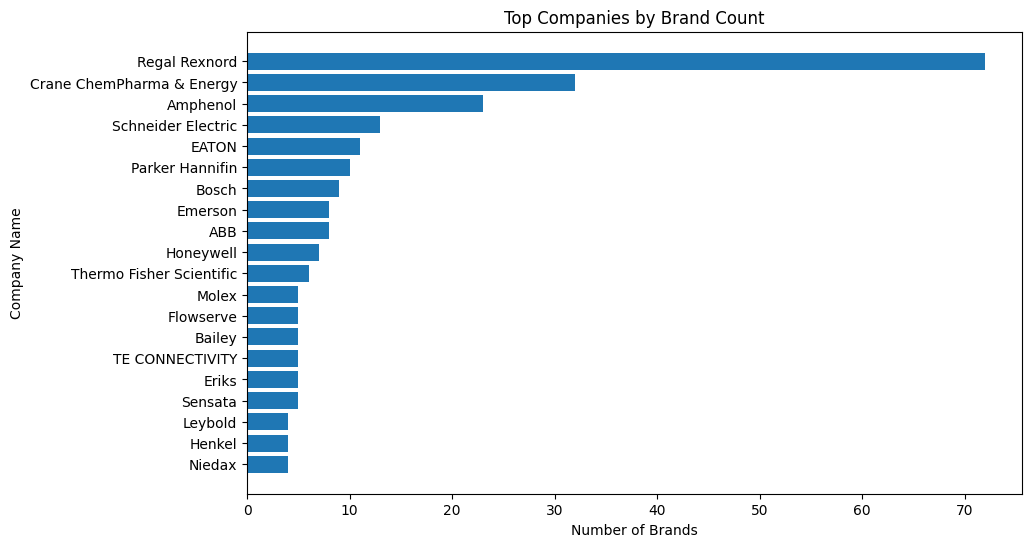

In [62]:
import matplotlib.pyplot as plt

top_companies = df_companies_brands.sort_values(by="brand_count", ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_companies["company_name"], top_companies["brand_count"])
plt.xlabel("Number of Brands")
plt.ylabel("Company Name")
plt.title("Top Companies by Brand Count")
plt.gca().invert_yaxis()
plt.show()


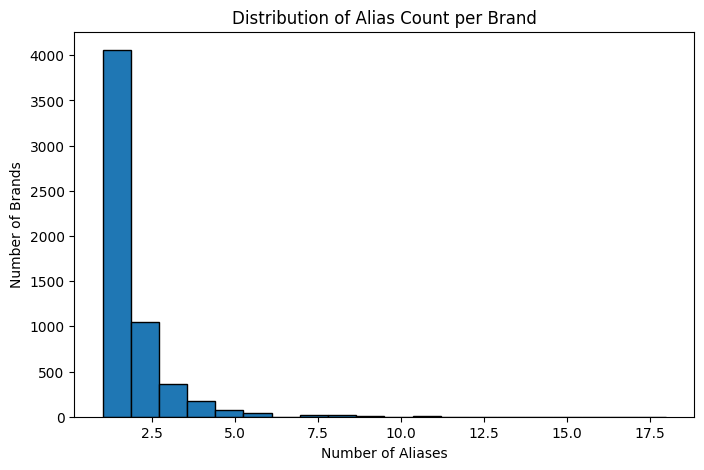

In [63]:
plt.figure(figsize=(8, 5))
plt.hist(df_brands_aliases["alias_count"], bins=20, edgecolor="black")
plt.xlabel("Number of Aliases")
plt.ylabel("Number of Brands")
plt.title("Distribution of Alias Count per Brand")
plt.show()

Identify & Merge Similar Manufacturers.
Use fuzzywuzzy or rapidfuzz for fuzzy matching:

In [97]:
# from fuzzywuzzy import process

# # Example: Finding closest manufacturer match
# def match_manufacturer(name, manufacturer_list):
#     return process.extractOne(name, manufacturer_list)

# df_company['standard_name'] = df_company['company_name'].apply(lambda x: match_manufacturer(x, df_company['company_name'].tolist())[0])

In [59]:
df_test=df_company.iloc[0:10]

In [60]:
from fuzzywuzzy import process

# Example: Finding closest manufacturer match
def match_manufacturer(name, manufacturer_list):
    return process.extractOne(name, manufacturer_list)

df_test['standard_name'] = df_test['company_name'].apply(lambda x: match_manufacturer(x, df_test['company_name'].tolist())[0])

C:\Users\RodrigoMartínezAlons\AppData\Local\Temp\ipykernel_24832\2416899605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['standard_name'] = df_test['company_name'].apply(lambda x: match_manufacturer(x, df_test['company_name'].tolist())[0])


Standarize brand alises

In [68]:
df_alias['canonical_brand'] = df_alias.groupby('brand_id')['alias_name'].transform('first')

### 2) Matching Manufacturer Names

In [138]:
from fuzzywuzzy import fuzz, process
import pandas as pd

In [139]:
df_manufacturer=pd.read_excel('data/MRO_Manufacturer_LFA1_2025_01_27.xlsx')

c:\Users\RodrigoMartínezAlons\OneDrive - Sparrow Networks GmbH\Python\venv_seedtag\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [140]:
def clean_text(text):
    if pd.isna(text):
        return ""
    return re.sub(r'[^A-Za-z0-9]', '', text).upper()

# Apply cleaning to company_name, brand_name, and alias_name
df_final["company_cleaned"] = df_final["company_name"].apply(clean_text)
df_final["brand_cleaned"] = df_final["brand_name"].apply(clean_text)
df_final["alias_cleaned"] = df_final["alias_name"].apply(clean_text)
df_manufacturer["NAME1_cleaned"] = df_manufacturer["NAME1"].apply(clean_text)
df_manufacturer["MCOD1_cleaned"] = df_manufacturer["MCOD1"].apply(clean_text)

In [141]:
df_final.head()

,company_id,company_name,company_status,brand_id,brand_name,alias_id,alias_name,is_mfr,is_supplier,company_cleaned,brand_cleaned,alias_cleaned
0,5200,1A TAPES E. K.,open,5466,1A TAPES E. K.1,7535,1A TAPES E. K.,1.0,NaN,1ATAPESEK,1ATAPESEK1,1ATAPESEK
1,5201,2J ANTENNA,open,5467,2J ANTENNA,7537,2J ANTENNA,1.0,NaN,2JANTENNA,2JANTENNA,2JANTENNA
2,5202,2MANET,open,5468,2MANET,7538,2 MANET,1.0,NaN,2MANET,2MANET,2MANET
3,5203,3D PRINTZ,open,5469,3D PRINTZ,7539,3D PRINTZ,1.0,NaN,3DPRINTZ,3DPRINTZ,3DPRINTZ
4,5204,3D SYSTEMS,open,5470,3D SYSTEMS,7540,3D SYSTEMS,1.0,NaN,3DSYSTEMS,3DSYSTEMS,3DSYSTEMS


In [169]:
df_manufacturer[df_manufacturer['NAME1']=='ABB']

,OPSYS,LIFNR,LAND1,NAME1,ADRNR,MCOD1,KTOkK,LOEVM,NAME1_cleaned,MCOD1_cleaned
10120,PMD,7637399,KY,ABB,878668,ABB,YCMP,NaN,ABB,ABB


In [181]:
df_sample_final=df_final.iloc[0:1000]
df_sample_manufacturer=df_manufacturer.iloc[0:1000]

In [198]:
df_manufacturer.head()

,OPSYS,LIFNR,LAND1,NAME1,ADRNR,MCOD1,KTOkK,LOEVM,NAME1_cleaned,MCOD1_cleaned
0,PMD,5368080,KY,AAA Technology & Specialties Co,445840,AAA TECHNOLOGY & SPECIALT,YCMP,NaN,AAATECHNOLOGYSPECIALTIESCO,AAATECHNOLOGYSPECIALT
1,PMD,5368099,KY,ABCO PLASTICS DIV,445835,ABCO PLASTICS DIV,YCMP,NaN,ABCOPLASTICSDIV,ABCOPLASTICSDIV
2,PMD,5368102,KY,Pikotek/AccuSeal,445813,PIKOTEK/ACCUSEAL,YCMP,NaN,PIKOTEKACCUSEAL,PIKOTEKACCUSEAL
3,PMD,5368110,KY,"ACF INDUSTRIES, INC.",445841,"ACF INDUSTRIES, INC.",YCMP,NaN,ACFINDUSTRIESINC,ACFINDUSTRIESINC
4,PMD,5368129,KY,Atlantic States Cast Iron Pipe C,445777,ATLANTIC STATES CAST IRON,YCMP,NaN,ATLANTICSTATESCASTIRONPIPEC,ATLANTICSTATESCASTIRON


In [224]:
def get_best_match_any(name, choices):
    result = process.extractOne(name, choices.tolist(), scorer=fuzz.token_sort_ratio)
    if result:
        return result[:2]  # Return match and score
    return (None, None)

# Function to get best match with error handling
def get_best_match(name, choices, threshold=80):
    result = process.extractOne(name, choices.tolist(), scorer=fuzz.token_sort_ratio)
    if result:
        best_match, score = result[:2]  # Unpack only the first two values
        return (best_match, score) if score >= threshold else (None, None)
    return (None, None)

Similarity(A,B)=(1− Lev(A,B)/max(∣A∣,∣B∣))×100

In [185]:
# Perform fuzzy matching between company_name and df_manufacturer['NAME1']
matches = []
for _, row in df_final.iterrows():  # Using a sample of rows for efficiency
    company = row["company_name"]
    match_name1, score = get_best_match(company, df_manufacturer["NAME1"])  # df2 represents df_manufacturer

    matches.append({
        "company_name": company,
        "matched_NAME1": match_name1,
        "match_score": score,
    })

# Convert matches to DataFrame
matches_df = pd.DataFrame(matches)

In [236]:
matches_df.head()

,company_name,matched_NAME1,match_score
0,1A TAPES E. K.,None,NaN
1,2J ANTENNA,None,NaN
2,2MANET,None,NaN
3,3D PRINTZ,None,NaN
4,3D SYSTEMS,"3D SYSTEMS, INC",83.0


In [242]:
none_values_df = matches_df[matches_df['matched_NAME1'].isna()]
print(none_values_df)

                  company_name matched_NAME1  match_score
0               1A TAPES E. K.          None          NaN
1                   2J ANTENNA          None          NaN
2                       2MANET          None          NaN
3                    3D PRINTZ          None          NaN
5                           3F          None          NaN
...                        ...           ...          ...
8870  STANLEY BLACK AND DECKER          None          NaN
8883                MITSUBOSHI          None          NaN
8902                 PSG DOVER          None          NaN
8903                 PSG DOVER          None          NaN
8904                 PSG DOVER          None          NaN

[4183 rows x 3 columns]


In [200]:
# matches_df.to_csv('data/matches_company.csv')

In [197]:
matches_df['match_score'].value_counts()

match_score
100.0    1001
71.0      511
73.0      418
80.0      412
75.0      365
72.0      205
77.0      204
70.0      172
78.0      170
76.0      146
83.0      140
74.0      133
86.0      127
89.0       88
81.0       74
82.0       71
88.0       65
92.0       61
84.0       59
85.0       55
91.0       55
79.0       55
87.0       45
90.0       39
93.0       23
97.0       17
96.0        8
94.0        7
98.0        6
Name: count, dtype: int64

In [231]:
matches_df[matches_df['match_score']>95]

,company_name,matched_NAME1,match_score
6,3M,3M,100.0
7,3M,3M,100.0
8,3M,3M,100.0
19,AAF INTERNATIONAL,AAF INTERNATIONAL,100.0
23,AAVID THERMALLOY,AAVID THERMALLOY,100.0
...,...,...,...
8907,FLOWSERVE,FLOWSERVE,100.0
8908,FLOWSERVE,FLOWSERVE,100.0
8909,FLOWSERVE,FLOWSERVE,100.0
8911,MCMASTER-CARR,MCMASTER-CARR,100.0


In [208]:
df_final.head()

,company_id,company_name,company_status,brand_id,brand_name,alias_id,alias_name,is_mfr,is_supplier,company_cleaned,brand_cleaned,alias_cleaned
0,5200,1A TAPES E. K.,open,5466,1A TAPES E. K.1,7535,1A TAPES E. K.,1.0,NaN,1ATAPESEK,1ATAPESEK1,1ATAPESEK
1,5201,2J ANTENNA,open,5467,2J ANTENNA,7537,2J ANTENNA,1.0,NaN,2JANTENNA,2JANTENNA,2JANTENNA
2,5202,2MANET,open,5468,2MANET,7538,2 MANET,1.0,NaN,2MANET,2MANET,2MANET
3,5203,3D PRINTZ,open,5469,3D PRINTZ,7539,3D PRINTZ,1.0,NaN,3DPRINTZ,3DPRINTZ,3DPRINTZ
4,5204,3D SYSTEMS,open,5470,3D SYSTEMS,7540,3D SYSTEMS,1.0,NaN,3DSYSTEMS,3DSYSTEMS,3DSYSTEMS


In [192]:
# Perform fuzzy matching between company_name and df_manufacturer['NAME1']
matches_brand = []
for _, row in df_final.iterrows():  # Using a sample of rows for efficiency
    brand = row["brand_name"]
    match_name1, score = get_best_match(brand, df_manufacturer["NAME1"])  # df2 represents df_manufacturer

    matches_brand.append({
        "brand_name": brand,
        "matched_NAME1": match_name1,
        "match_score": score,
    })

# Convert matches to DataFrame
matches_df_brand = pd.DataFrame(matches_brand)

In [221]:
df_manufacturer.head()

,OPSYS,LIFNR,LAND1,NAME1,ADRNR,MCOD1,KTOkK,LOEVM,NAME1_cleaned,MCOD1_cleaned
0,PMD,5368080,KY,AAA Technology & Specialties Co,445840,AAA TECHNOLOGY & SPECIALT,YCMP,NaN,AAATECHNOLOGYSPECIALTIESCO,AAATECHNOLOGYSPECIALT
1,PMD,5368099,KY,ABCO PLASTICS DIV,445835,ABCO PLASTICS DIV,YCMP,NaN,ABCOPLASTICSDIV,ABCOPLASTICSDIV
2,PMD,5368102,KY,Pikotek/AccuSeal,445813,PIKOTEK/ACCUSEAL,YCMP,NaN,PIKOTEKACCUSEAL,PIKOTEKACCUSEAL
3,PMD,5368110,KY,"ACF INDUSTRIES, INC.",445841,"ACF INDUSTRIES, INC.",YCMP,NaN,ACFINDUSTRIESINC,ACFINDUSTRIESINC
4,PMD,5368129,KY,Atlantic States Cast Iron Pipe C,445777,ATLANTIC STATES CAST IRON,YCMP,NaN,ATLANTICSTATESCASTIRONPIPEC,ATLANTICSTATESCASTIRON


In [232]:
df_final.head(2)

,company_id,company_name,company_status,brand_id,brand_name,alias_id,alias_name,is_mfr,is_supplier,company_cleaned,brand_cleaned,alias_cleaned
0,5200,1A TAPES E. K.,open,5466,1A TAPES E. K.1,7535,1A TAPES E. K.,1.0,NaN,1ATAPESEK,1ATAPESEK1,1ATAPESEK
1,5201,2J ANTENNA,open,5467,2J ANTENNA,7537,2J ANTENNA,1.0,NaN,2JANTENNA,2JANTENNA,2JANTENNA


In [233]:
# Perform fuzzy matching between company_name and df_manufacturer['NAME1']
matches_alias = []
for _, row in df_final.iterrows():  # Using a sample of rows for efficiency
    alias = row["alias_name"]
    match_name1, score = get_best_match(alias, df_manufacturer["NAME1"])  # df2 represents df_manufacturer

    matches_alias.append({
        "alias_name": alias,
        "matched_NAME1": match_name1,
        "match_score": score,
    })

# Convert matches to DataFrame
matches_df_alias = pd.DataFrame(matches_alias)

In [234]:
matches_df_alias.head(30)

,alias_name,matched_NAME1,match_score
0,1A TAPES E. K.,None,NaN
1,2J ANTENNA,None,NaN
2,2 MANET,None,NaN
3,3D PRINTZ,None,NaN
4,3D SYSTEMS,"3D SYSTEMS, INC",83.0
5,3F,None,NaN
6,3M,3M,100.0
7,3M E.A.R,None,NaN
8,3M PELTOR,None,NaN
9,3-PRO,None,NaN


In [230]:
matches_df_alias.matched_NAME1.value_counts()

Series([], Name: count, dtype: int64)

In [213]:
df_final.head(3)

,company_id,company_name,company_status,brand_id,brand_name,alias_id,alias_name,is_mfr,is_supplier,company_cleaned,brand_cleaned,alias_cleaned
0,5200,1A TAPES E. K.,open,5466,1A TAPES E. K.1,7535,1A TAPES E. K.,1.0,NaN,1ATAPESEK,1ATAPESEK1,1ATAPESEK
1,5201,2J ANTENNA,open,5467,2J ANTENNA,7537,2J ANTENNA,1.0,NaN,2JANTENNA,2JANTENNA,2JANTENNA
2,5202,2MANET,open,5468,2MANET,7538,2 MANET,1.0,NaN,2MANET,2MANET,2MANET


In [239]:
matches_df_company=matches_df.copy()

In [240]:
matches_df_company.head()

,company_name,matched_NAME1,match_score
0,1A TAPES E. K.,None,NaN
1,2J ANTENNA,None,NaN
2,2MANET,None,NaN
3,3D PRINTZ,None,NaN
4,3D SYSTEMS,"3D SYSTEMS, INC",83.0


In [215]:
matches_df_brand.head(3)

,brand_name,matched_NAME1,match_score
0,1A TAPES E. K.1,None,NaN
1,2J ANTENNA,None,NaN
2,2MANET,None,NaN


In [241]:
matches_df_alias.head(3)

,alias_name,matched_NAME1,match_score
0,1A TAPES E. K.,None,NaN
1,2J ANTENNA,None,NaN
2,2 MANET,None,NaN


In [217]:
matches_df_alias.shape

(8915, 3)

In [218]:
matches_df_alias.matched_NAME1.value_counts()

matched_NAME1
IIMAK    8915
Name: count, dtype: int64

In [153]:
matches_df.matched_NAME1.value_counts()

matched_NAME1
ARGUS                              8
ARMCO                              6
AMATEX                             5
B-LINE SYSTEMS,INC                 3
BLACKBURN                          2
CRANE-ALOYCO                       2
ARCA-GERMANY                       2
BRITT ENGINEERING, INC             2
Pikotek/AccuSeal                   2
Bayer AG                           2
BRAY VALVE & CONTROLS,USA          2
AITKEN, INC.                       1
ANVIL INTERNATIONAL INC            1
ACF INDUSTRIES, INC.               1
ALCOA, Inc.                        1
BARKSDALE,INC                      1
Air/Tak, Inc.                      1
CADWELD/ERICO,INC                  1
AAA Technology & Specialties Co    1
ADVANCE TRANSFORMER CO.            1
Name: count, dtype: int64

In [ ]:
matches_df

In [104]:
df_manufacturer[df_manufacturer['NAME1']=='FESTO']

,OPSYS,LIFNR,LAND1,NAME1,ADRNR,MCOD1,KTOkK,LOEVM
2793,PMD,7125681,KY,FESTO,716526,FESTO,YCMP,NaN


In [100]:
df_manufacturer.shape

(10983, 8)